In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
import seaborn as sns
import datetime as dt
from datetime import datetime

In [175]:
df = pd.read_csv('data/master_data_with_sequel_director.csv')

In [176]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [177]:
df1 = df[['budget','is_sequel','domestic_opening_sales','release_date','top50_d']]

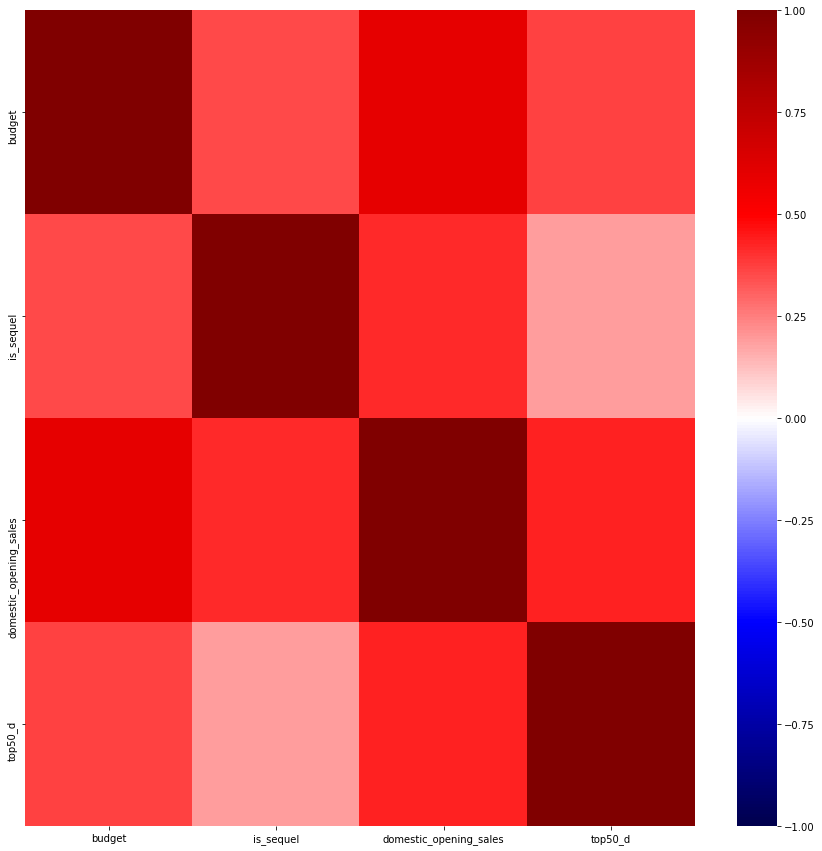

In [178]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

<ipython-input-179-c8ef9a649a47>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);


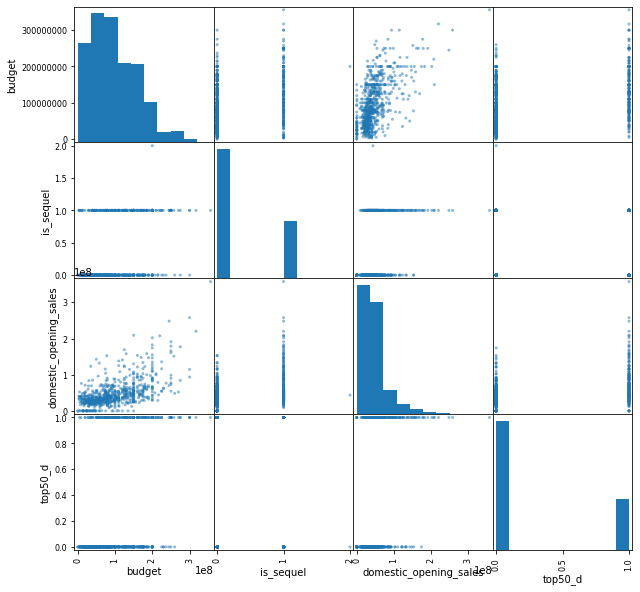

In [179]:
fig, ax = plt.subplots(figsize=(10, 10))
pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);

In [180]:
x = df[['budget','dd_top5','is_sequel','release_date','rating','month','top50_d']]

y = df['domestic_opening_sales']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2, random_state=5)
#previous random state 10
#5

In [181]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.25, random_state=10)
#Previous random state 3
#10

In [182]:
x_train['release_date']= x_train['release_date'].map(dt.datetime.toordinal)
x_val['release_date']= x_val['release_date'].map(dt.datetime.toordinal)

Text(0.5, 1.0, 'Budget versus domestic opening sales top movies from 2000 to 2020')

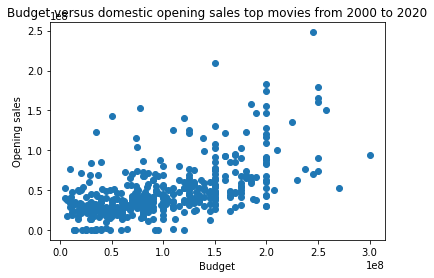

In [183]:
#fig, ax = plt.subplots(figsize=(9, 7))

budget_x = x_train['budget']
sales_y = y_train

plt.scatter(budget_x, sales_y)
plt.xlabel('Budget')
plt.ylabel('Opening sales')
plt.title('Budget versus domestic opening sales top movies from 2000 to 2020')

In [184]:
x_budget_train = x_train[['budget']]
x_budget_val = x_val[['budget']]
x_budget_test = x_test[['budget']]

In [185]:
#x_train_df = pd.DataFrame(x_train, index=x_train.index)
#x_val_df = pd.DataFrame(x_val, index=x_val.index)
#x_test_df = pd.DataFrame(x_val, index=x_test.index)

In [186]:
#scaler = StandardScaler()

#x_train_scaled = scaler.fit_transform(x_train.values)
#x_val_scaled = scaler.transform(x_val.values)
#x_test_scaled = scaler.transform(x_test.values)

In [187]:
b_lr = LinearRegression()

b_lr.fit(x_budget_train, y_train)

b_lr.score(x_budget_val, y_val) #R2

y_pred = b_lr.predict(x_budget_val)
np.sqrt(mean_squared_error(y_val, y_pred))

35543294.828940324

In [188]:
b_lr.score(x_budget_val, y_val) #R2

0.4238464519853321

In [189]:
b_lr.intercept_

16333629.904164758

In [190]:
x_sequel_train = x_train[['is_sequel']]
x_sequel_val = x_val[['is_sequel']]
x_sequel_test = x_test[['is_sequel']]

In [191]:
seq_lr = LinearRegression()

seq_lr.fit(x_sequel_train, y_train)

seq_lr.score(x_sequel_val, y_val) #R2

y_pred = seq_lr.predict(x_sequel_val)
np.sqrt(mean_squared_error(y_val, y_pred))

43318553.412436575

In [192]:
seq_lr.score(x_sequel_val, y_val)

0.14420299314030882

In [193]:
seq_lr.score(x_sequel_test, y_test) #R2

y_pred = seq_lr.predict(x_sequel_test)
np.sqrt(mean_squared_error(y_test, y_pred))

31369844.233847156

In [194]:
combined_train_df = pd.concat([x_budget_train, x_sequel_train], axis=1)

combined_val_df = pd.concat([x_budget_val, x_sequel_val], axis=1)
combined_val_df.head()

,budget,is_sequel
96,60000000,0
377,217000000,1
137,90000000,1
6,220000000,1
18,160000000,0


In [195]:
combo_lr = LinearRegression()

combo_lr.fit(combined_train_df, y_train)

combo_lr.score(combined_val_df, y_val) #R2

y_pred = combo_lr.predict(combined_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

34887607.47727439

In [196]:
combo_lr.score(combined_val_df, y_val) #R2


0.44490764319624065

In [197]:
x_dd_train = x_train[['dd_top5']]
x_dd_val = x_val[['dd_top5']]
x_dd_test = x_test[['dd_top5']]

In [198]:
dd_lr = LinearRegression()

dd_lr.fit(x_dd_train, y_train)

dd_lr.score(x_dd_val, y_val) #R2

y_pred = dd_lr.predict(x_dd_val)
np.sqrt(mean_squared_error(y_val, y_pred))

46089811.11303783

In [199]:
dd_lr.score(x_dd_val, y_val) #R2

0.03120312510328671

In [200]:
x_date_train = x_train[['release_date']]
x_date_val = x_val[['release_date']]
#x_date_test = x_test[['release_date']]

In [201]:
date_lr = LinearRegression()

date_lr.fit(x_date_train, y_train)

date_lr.score(x_date_val, y_val) #R2

y_pred = date_lr.predict(x_date_val)
np.sqrt(mean_squared_error(y_val, y_pred))

45569676.06921456

In [202]:
date_lr.score(x_date_val, y_val) #R2
#Should actually try by month, year rather than down to the day?

0.05294597215587871

In [203]:
cat_x_train =  x_train[['rating']]
cat_x_val =  x_val[['rating']]
cat_x_test =  x_test[['rating']]

In [204]:
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(cat_x_train)

ohe_x_train = ohe.transform(cat_x_train)

columns = ohe.get_feature_names(['rating'])

ohe_x_train_df = pd.DataFrame(ohe_x_train, columns=columns, index=cat_x_train.index)

ohe_x_train_df.head()

,rating_PG,rating_PG-13,rating_R
128,0.0,1.0,0.0
254,1.0,0.0,0.0
394,0.0,1.0,0.0
532,0.0,1.0,0.0
78,0.0,1.0,0.0


In [205]:
ohe_v = OneHotEncoder(drop='first', sparse=False)

ohe_v.fit(cat_x_val)

ohe_x_val = ohe_v.transform(cat_x_val)

columns_v = ohe_v.get_feature_names(['rating'])

ohe_x_val_df = pd.DataFrame(ohe_x_val, columns=columns, index=cat_x_val.index)

ohe_x_val_df.head()

,rating_PG,rating_PG-13,rating_R
96,1.0,0.0,0.0
377,0.0,1.0,0.0
137,0.0,1.0,0.0
6,0.0,1.0,0.0
18,0.0,1.0,0.0


In [206]:
rating_lr = LinearRegression()

rating_lr.fit(ohe_x_train_df, y_train)

rating_lr.score(ohe_x_val_df, y_val) #R2

y_pred = rating_lr.predict(ohe_x_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

45594816.880373

In [207]:
rating_lr.score(ohe_x_val, y_val) #R2

0.05190070361599797

In [208]:
combined_train_df = pd.concat([combined_train_df, ohe_x_train_df,x_dd_train], axis=1)

combined_val_df =  pd.concat([combined_val_df, ohe_x_val_df,x_dd_val], axis=1)
combined_val_df.head()

,budget,is_sequel,rating_PG,rating_PG-13,rating_R,dd_top5
96,60000000,0,1.0,0.0,0.0,0
377,217000000,1,0.0,1.0,0.0,0
137,90000000,1,0.0,1.0,0.0,0
6,220000000,1,0.0,1.0,0.0,1
18,160000000,0,0.0,1.0,0.0,1


In [209]:
cont_cat_lr = LinearRegression()

cont_cat_lr.fit(combined_train_df, y_train)

cont_cat_lr.score(combined_val_df, y_val) #R2

y_pred = cont_cat_lr.predict(combined_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

34493465.034348555

In [210]:
cont_cat_lr.score(combined_val_df, y_val) #R2

0.45737909709557023

In [211]:
cat_month_train =  x_train[['month']]
cat_month_val =  x_val[['month']]
cat_month_test =  x_test[['month']]

In [212]:
ohe_month_tr = OneHotEncoder(drop='first', sparse=False)

ohe_month_tr.fit(cat_month_train)

ohe_month_train = ohe_month_tr.transform(cat_month_train)

columns_month_tr = ohe_month_tr.get_feature_names(['month'])

ohe_month_train_df = pd.DataFrame(ohe_month_train, columns=columns_month_tr, index = cat_month_train.index)

ohe_month_train_df.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
394,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [213]:
ohe_month_val = OneHotEncoder(drop='first', sparse=False)

ohe_month_val.fit(cat_month_val)

ohe_month_validate = ohe_month_val.transform(cat_month_val)

columns_month_val = ohe_month_val.get_feature_names(['month'])

ohe_month_val_df = pd.DataFrame(ohe_month_validate, columns=columns_month_val, index = cat_month_val.index)

ohe_month_val_df.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
96,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
month_lr = LinearRegression()

month_lr.fit(ohe_month_train_df, y_train)

month_lr.score(ohe_month_val_df, y_val) #R2

y_pred = month_lr.predict(ohe_month_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

43919428.68813234

In [215]:
month_lr.score(ohe_month_val_df, y_val) #R2

0.12029666819085227

In [216]:
combined_train_df_1 = pd.concat([combined_train_df, ohe_month_train_df], axis=1)

combined_val_df_1 =  pd.concat([combined_val_df, ohe_month_val_df], axis=1)
combined_val_df_1.head()

,budget,is_sequel,rating_PG,rating_PG-13,rating_R,dd_top5,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
96,60000000,0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,217000000,1,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
137,90000000,1,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,220000000,1,0.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,160000000,0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
cont_cat_lr2 = LinearRegression()

cont_cat_lr2.fit(combined_train_df_1, y_train)

cont_cat_lr2.score(combined_val_df_1, y_val) #R2

y_pred = cont_cat_lr2.predict(combined_val_df_1)
np.sqrt(mean_squared_error(y_val, y_pred))

32469278.650425117

In [218]:
cont_cat_lr2.score(combined_val_df_1, y_val) #R2

0.5191959101837964

In [219]:
combined_train_df_2 = combined_train_df_1.drop('dd_top5', axis=1)

combined_val_df_2 = combined_val_df_1.drop('dd_top5', axis=1)

combined_val_df_2.head()

,budget,is_sequel,rating_PG,rating_PG-13,rating_R,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
96,60000000,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,217000000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
137,90000000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,220000000,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,160000000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
cont_cat_lr3 = LinearRegression()

cont_cat_lr3.fit(combined_train_df_2, y_train)

cont_cat_lr3.score(combined_val_df_2, y_val) #R2

y_pred = cont_cat_lr3.predict(combined_val_df_2)
np.sqrt(mean_squared_error(y_val, y_pred))

32489888.067591056

In [221]:
cont_cat_lr3.score(combined_val_df_2, y_val) #R2

0.5185853492288015

In [222]:
x_director_train = x_train[['top50_d']]
x_director_val = x_val[['top50_d']]
x_director_test = x_test[['top50_d']]

In [223]:
dir_lr = LinearRegression()

dir_lr.fit(x_director_train, y_train)

dir_lr.score(x_director_val, y_val) #R2

y_pred = dir_lr.predict(x_director_val)
np.sqrt(mean_squared_error(y_val, y_pred))

41774106.39959793

In [224]:
dir_lr.score(x_director_val, y_val) #R2

0.20413902473781076

In [225]:
combined_train_df_2 = pd.concat([combined_train_df_2, x_director_train], axis=1)

combined_val_df_2 =  pd.concat([combined_val_df_2, x_director_val], axis=1)
combined_val_df_2.head()

,budget,is_sequel,rating_PG,rating_PG-13,rating_R,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,top50_d
96,60000000,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
377,217000000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
137,90000000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
6,220000000,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18,160000000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [226]:
combo_lr2 = LinearRegression()

combo_lr2.fit(combined_train_df_2, y_train)

combo_lr2.score(combined_val_df_2, y_val) #R2

y_pred = combo_lr2.predict(combined_val_df_2)
np.sqrt(mean_squared_error(y_val, y_pred))

31552439.90763232

In [227]:
combo_lr2.score(combined_val_df_2, y_val) #R2

0.5459655888122182

In [228]:
combined_train_df_3 = combined_train_df_2.drop(['rating_PG','rating_PG-13','rating_R'],axis=1)

combined_val_df_3 = combined_val_df_2.drop(['rating_PG','rating_PG-13','rating_R'], axis=1)

combined_val_df_3.head()

,budget,is_sequel,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,top50_d
96,60000000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
377,217000000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
137,90000000,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
6,220000000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18,160000000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [229]:
combo_lr3 = LinearRegression()

combo_lr3.fit(combined_train_df_3, y_train)

combo_lr3.score(combined_val_df_3, y_val) #R2

y_pred = combo_lr3.predict(combined_val_df_3)
np.sqrt(mean_squared_error(y_val, y_pred))

31848042.152652204

In [230]:
combo_lr3.score(combined_val_df_3, y_val) #R2

0.5374184026989507

In [231]:
#sorted(list(zip(x_test_df.columns, np.round(lr.coef_, 3))), key=lambda x: x[1])